<a href="https://colab.research.google.com/github/maulss/PCVK/blob/main/Minggu5_PVCK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Muhammad Maulana Givari
# 2141720141
# TI-3C

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Tugas Praktikum**

1. Buat Gamma Correction sesuai dengan pentunjuk berikut.

In [65]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from math import log10, sqrt
import glob

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


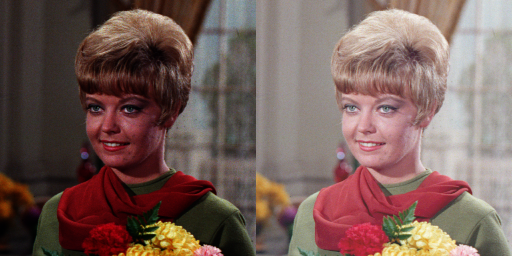

In [41]:
print(' Gamma Correction pada citra ')
print('-------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PVCK/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth


 Simulasi Image Depth  
--------------------------
Masukkan nilai Bit Depth: 1


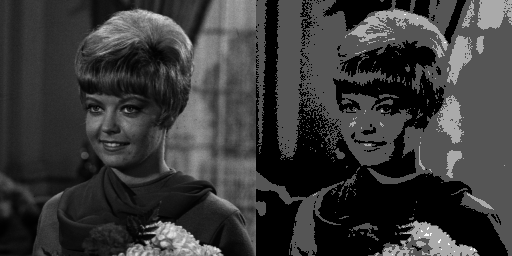

In [42]:
original = cv.imread('/content/drive/MyDrive/PVCK/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth  ')
print('--------------------------')
try:
  bd = float(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

bit = 2
level = 255 / (pow(2, bit)-1)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        depth_image[y, x] = np.clip(round(original[y, x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)


3. Buat modul Average Denoising

In [43]:
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PVCK/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

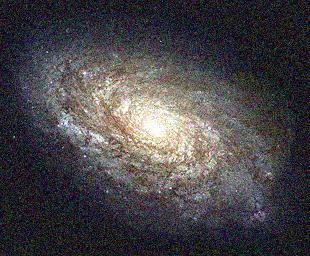

In [44]:
dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(n)

In [45]:
import math

def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------------')
try:
  averageCitra = int(input('Masukan jumlah citra average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR: ')
print(result)

PSNR
------------------------------
Masukan jumlah citra average: 5
Nilai PSNR: 
28.344365719614217


Nilai PSNR adalah 27.542452426645532 (dB)


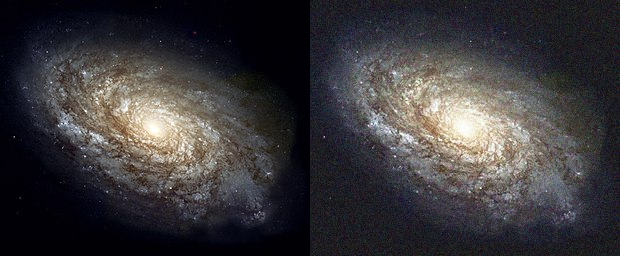

In [48]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PVCK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PVCK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.529199948073288 (dB)


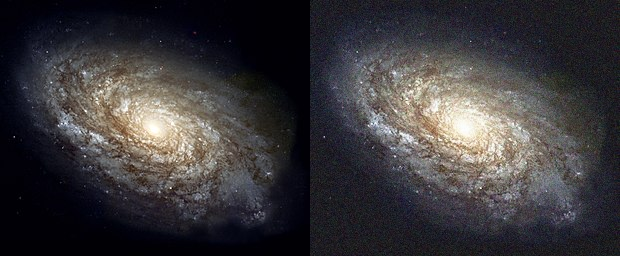

In [49]:
# Jumlah Citra di Average 5
dst = cv_img[0]
noise_number = 5
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.548078858474195 (dB)


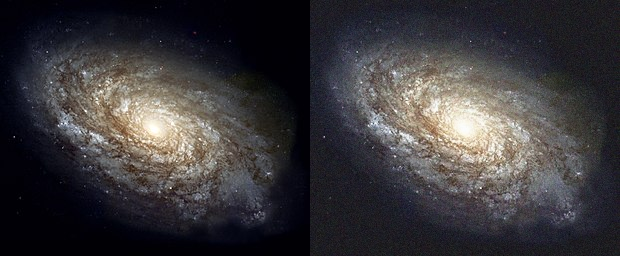

In [51]:
# Jumlah Citra di Average 10
dst = cv_img[0]
noise_number = 10
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.53664061137288 (dB)


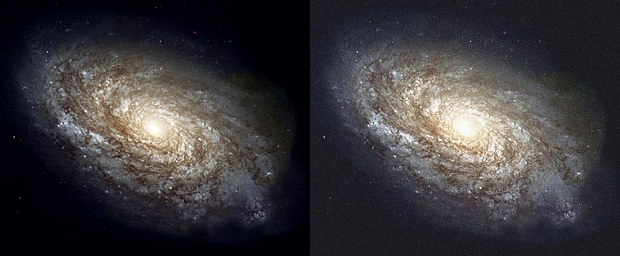

In [52]:
# Jumlah Citra di Average 20
dst = cv_img[0]
noise_number = 20
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.499260959870277 (dB)


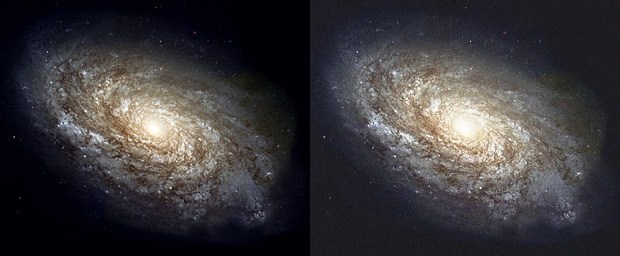

In [53]:
# Jumlah Citra di Average 40
dst = cv_img[0]
noise_number = 40
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.506005254582032 (dB)


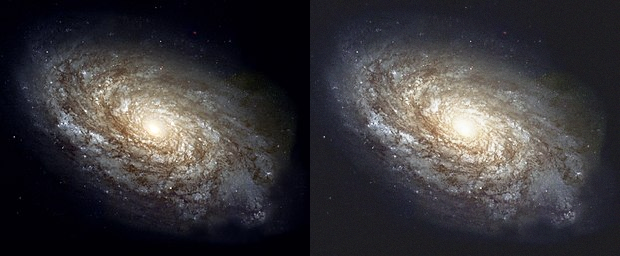

In [54]:
# Jumlah Citra di Average 80
dst = cv_img[0]
noise_number = 80
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.509441410201827 (dB)


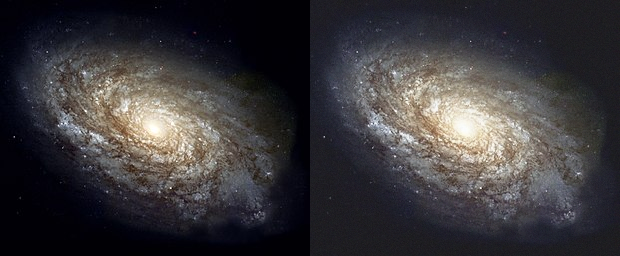

In [55]:
# Jumlah Citra di Average 100
dst = cv_img[0]
noise_number = 100
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:

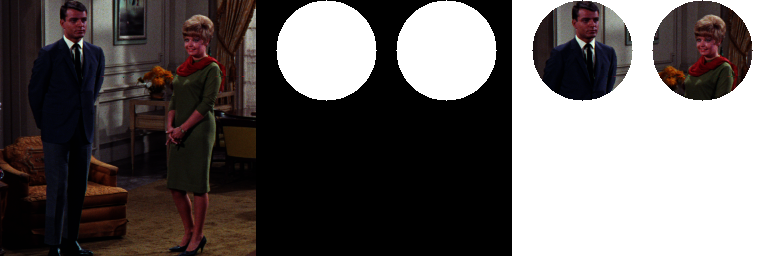

In [56]:
img = cv.imread('/content/drive/MyDrive/PVCK/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50,(255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50,(255,255,255), -1)

result = img & mask & mask2
#fungsi dari opencv berikut juga bisa digunakkan
#result = cv.bitwise_and(image, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)


5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

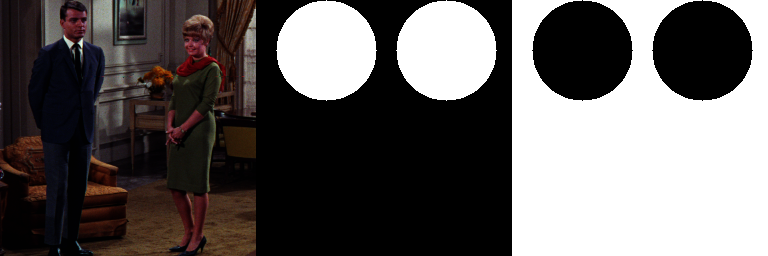

In [107]:
# operator NOT
img = cv.imread('/content/drive/MyDrive/PVCK/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50,(255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50,(255,255,255), -1)

result = img & (~mask) & (~mask2)
#fungsi dari opencv berikut juga bisa digunakkan
#result = cv.bitwise_and(image, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)


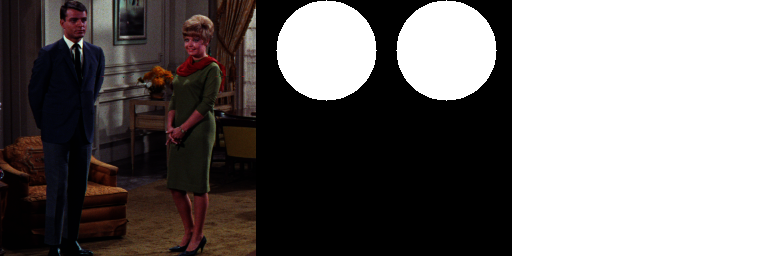

In [57]:
# operator OR
img = cv.imread('/content/drive/MyDrive/PVCK/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50,(255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50,(255,255,255), -1)

result = img | mask | mask2
#fungsi dari opencv berikut juga bisa digunakkan
#result = cv.bitwise_and(image, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)


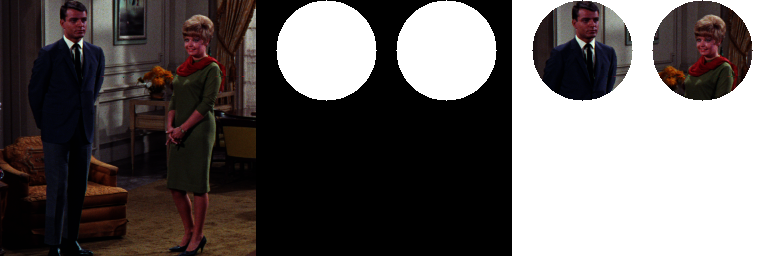

In [78]:
# operator AND
img = cv.imread('/content/drive/MyDrive/PVCK/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50,(255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50,(255,255,255), -1)

result = img & mask & mask2
#fungsi dari opencv berikut juga bisa digunakkan
#result = cv.bitwise_and(image, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)


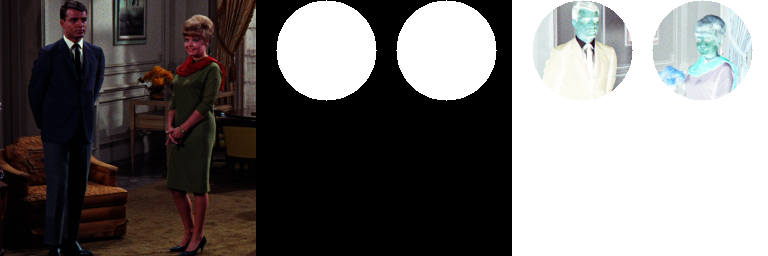

In [106]:
# operator NAND
img = cv.imread('/content/drive/MyDrive/PVCK/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50,(255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50,(255,255,255), -1)

result = ~(img & mask & mask2)
#fungsi dari opencv berikut juga bisa digunakkan
#result = cv.bitwise_and(image, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)


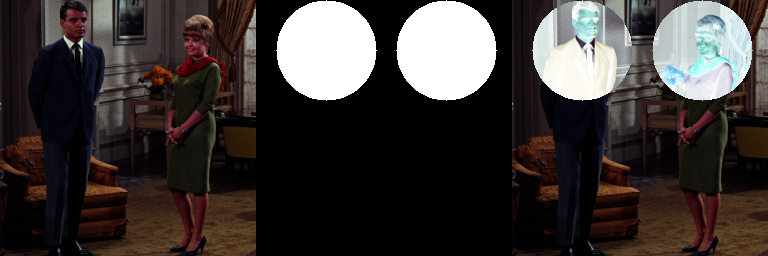

In [100]:
# operator XOR
img = cv.imread('/content/drive/MyDrive/PVCK/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50,(255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50,(255,255,255), -1)

result = cv.bitwise_xor(img, mask)

#fungsi dari opencv berikut juga bisa digunakkan
#result = cv.bitwise_and(image, mask)


final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)


**TUGAS**

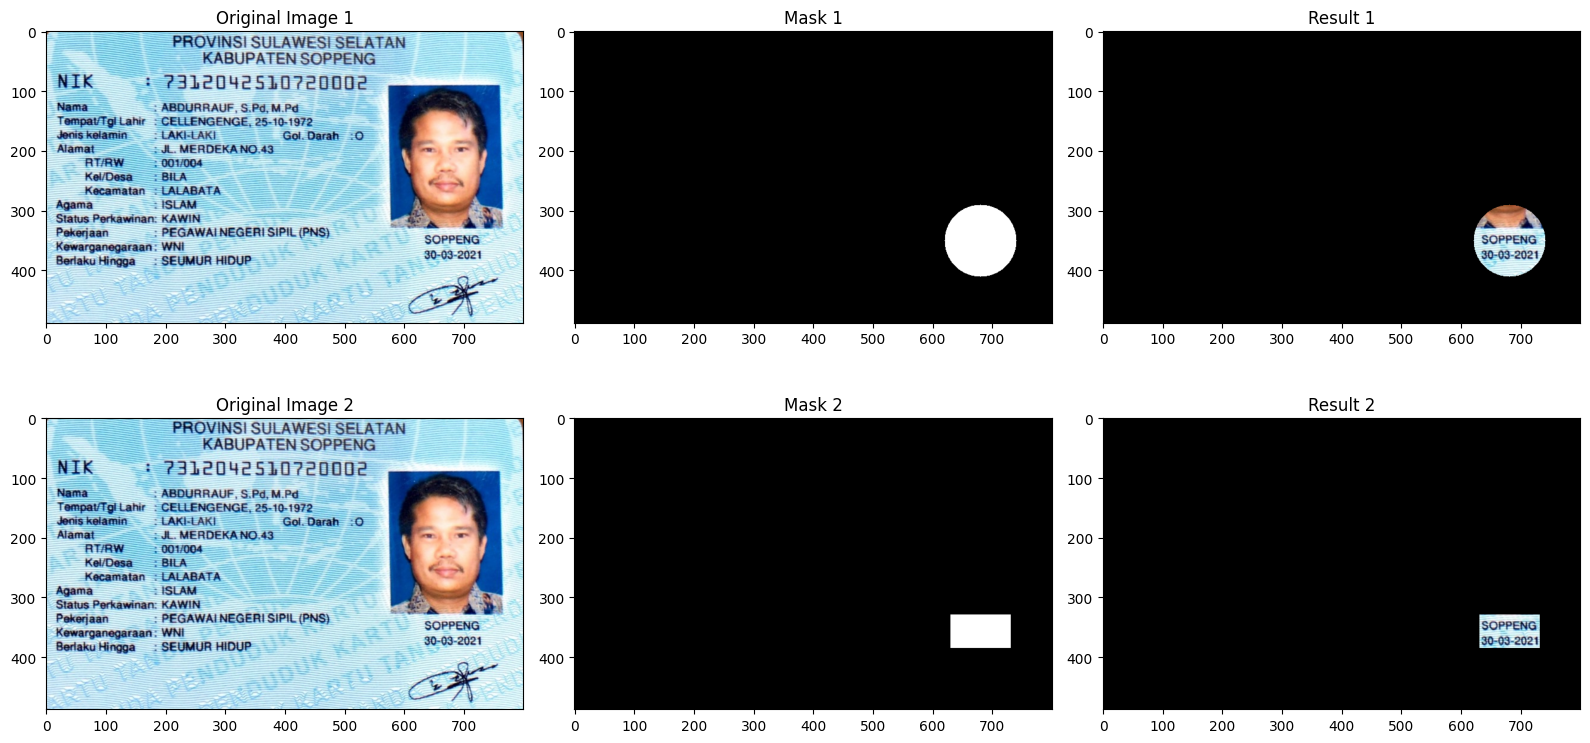

In [171]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

plt.figure(figsize=(16, 8))

img = cv.imread('/content/drive/MyDrive/PVCK/ktppvck.jpeg')

mask1 = np.zeros_like(img) # membuat mask background hitam dengan array

mask2 = np.zeros_like(img) # membuat mask background hitam dengan array

center_coordinates1 = (680, 350) # titik tengah kordinat lingkaran 2
radius1 = 60 # radius lingkaran 1
color = (255, 255, 255)
thickness = -1 # ketebalan
cv.circle(mask1, center_coordinates1, radius1, color, thickness) # lingkaran 1 pada mask1

# Kotak
pt1_rect2 = (630, 330)  # Titik pojok kiri atas
pt2_rect2 = (730, 385)  # Titik pojok kanan bawah

color = (255, 255, 255)  # Warna putih
thickness = -1

# Menggambar kotak kedua pada mask2
cv.rectangle(mask2, pt1_rect2, pt2_rect2, color, thickness)

result1 = cv.bitwise_and(img, mask1) # menggabungkan image asli dengan mask1

result2 = cv.bitwise_and(img, mask2) # menggabungkan image asli dengan mask2

plt.subplot(231)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image 1')

plt.subplot(232)
plt.imshow(cv.cvtColor(mask1, cv.COLOR_BGR2RGB))
plt.title('Mask 1')

plt.subplot(233)
plt.imshow(cv.cvtColor(result1, cv.COLOR_BGR2RGB))
plt.title('Result 1')

plt.subplot(234)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image 2')

plt.subplot(235)
plt.imshow(cv.cvtColor(mask2, cv.COLOR_BGR2RGB))
plt.title('Mask 2')

plt.subplot(236)
plt.imshow(cv.cvtColor(result2, cv.COLOR_BGR2RGB))
plt.title('Result 2')

plt.tight_layout()
plt.show()


